In [1]:
from __future__ import print_function

In [2]:
# We'll need numpy for some mathematical operations
import numpy as np

# matplotlib for displaying the output
import matplotlib.pyplot as plt
%matplotlib inline

# and IPython.display for audio output
import IPython.display

# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

In [3]:
audio_path_kitchen = librosa.util.example_audio_file()
audio_path_soccer = librosa.util.example_audio_file()
audio_path_coffee = librosa.util.example_audio_file()
audio_path_party = librosa.util.example_audio_file()

#or uncomment the line below and point it at your favorite song:

audio_path_kitchen = 'kitchen.wav'
audio_path_soccer = 'soccer.wav'
audio_path_coffee = 'coffee.wav'
audio_path_party = 'party.mp3'

y_kitchen, sr_kitchen = librosa.load(audio_path_kitchen)
y_soccer, sr_soccer = librosa.load(audio_path_soccer)
y_coffee, sr_coffee = librosa.load(audio_path_coffee)
y_party, sr_party = librosa.load(audio_path_party)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


# Mel spectrogram
This first step will show how to compute a [Mel](http://en.wikipedia.org/wiki/Mel_scale) spectrogram from an audio waveform.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


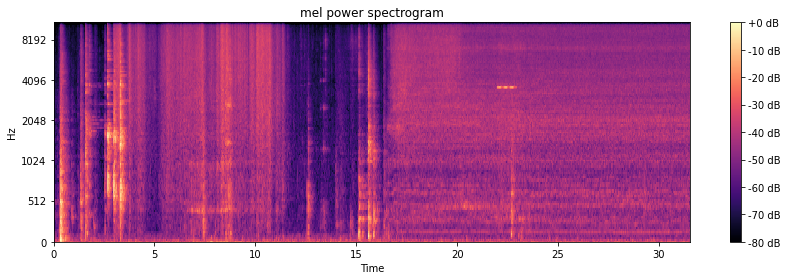

In [4]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S_kitchen = librosa.feature.melspectrogram(y_kitchen, sr=sr_kitchen, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S_kitchen = librosa.power_to_db(S_kitchen, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S_kitchen, sr=sr_kitchen, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')# Mel spectrogram

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

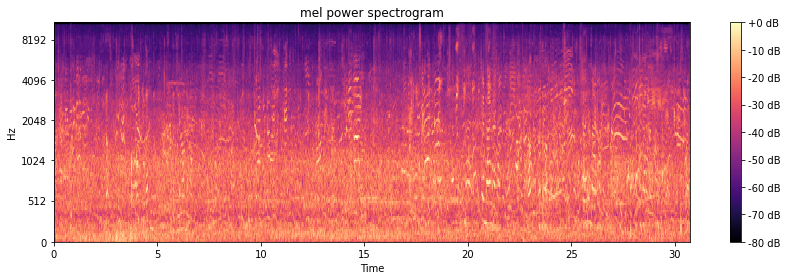

In [5]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S_soccer = librosa.feature.melspectrogram(y_soccer, sr=sr_soccer, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S_soccer = librosa.power_to_db(S_soccer, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S_soccer, sr=sr_soccer, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

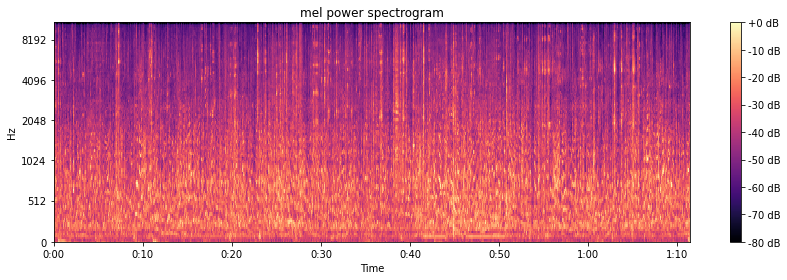

In [6]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S_coffee = librosa.feature.melspectrogram(y_coffee, sr=sr_coffee, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S_coffee = librosa.power_to_db(S_coffee, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S_coffee, sr=sr_coffee, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

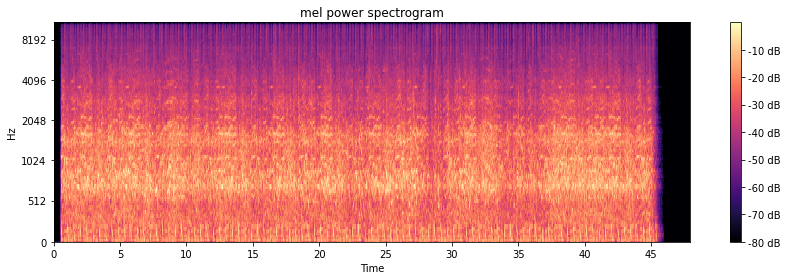

In [7]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S_party = librosa.feature.melspectrogram(y_party, sr=sr_party, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S_party = librosa.power_to_db(S_party, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S_party, sr=sr_party, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

# Feature Extraction

In [8]:
frame_size = 256
kitchen_step_size = 128

for counter in range(0, len(y_kitchen), kitchen_step_size):
    kitchen_frame = y_kitchen[counter:counter+frame_size]
    
    # Let's make and display a mel-scaled power (energy-squared) spectrogram
    S_kitchen = librosa.feature.melspectrogram(kitchen_frame, sr=sr_kitchen, n_mels=128)

    # Convert to log scale (dB). We'll use the peak power (max) as reference.
    log_S_kitchen = librosa.power_to_db(S_kitchen, ref=np.max)
    
    # Next, we'll extract the top 13 Mel-frequency cepstral coefficients (MFCCs)
    kitchen_mfcc = librosa.feature.mfcc(S=log_S_kitchen, n_mfcc=13)
    #kitchen_mfcc = librosa.feature.rms(y=kitchen_frame)
    
    kitchen_frame_features = np.hstack((kitchen_mfcc))
    
    if counter==0:
        kitchen_feature_vector = kitchen_frame_features
    else:
        kitchen_feature_vector = np.vstack((kitchen_feature_vector, kitchen_frame_features))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=256
  n_fft, y.shape[-1]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=143
  n_fft, y.shape[-1]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=15
  n_fft, y.shape[-1]


In [9]:
kitchen_feature_vector.shape

(5435, 13)

In [10]:
kitchen_out = np.full((5435, 1), 1)

In [11]:
frame_size = 256
soccer_step_size = 128

for counter in range(0, len(y_soccer), soccer_step_size):
    soccer_frame = y_soccer[counter:counter+frame_size]
    
    # Let's make and display a mel-scaled power (energy-squared) spectrogram
    S_soccer = librosa.feature.melspectrogram(soccer_frame, sr=sr_soccer, n_mels=128)

    # Convert to log scale (dB). We'll use the peak power (max) as reference.
    log_S_soccer = librosa.power_to_db(S_soccer, ref=np.max)

    # Next, we'll extract the top 13 Mel-frequency cepstral coefficients (MFCCs)
    soccer_mfcc = librosa.feature.mfcc(S=log_S_soccer, n_mfcc=13)
    #soccer_mfcc = librosa.feature.rms(y=soccer_frame)
    
    soccer_frame_features = np.hstack((soccer_mfcc))
    
    if counter==0:
        soccer_feature_vector = soccer_frame_features
    else:
        soccer_feature_vector = np.vstack((soccer_feature_vector, soccer_frame_features))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=131
  n_fft, y.shape[-1]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=3
  n_fft, y.shape[-1]


In [12]:
soccer_feature_vector.shape

(5293, 13)

In [13]:
soccer_out = np.full((5293, 1), 2)

In [14]:
frame_size = 256
coffee_step_size = 128

for counter in range(0, len(y_coffee), coffee_step_size):
    coffee_frame = y_coffee[counter:counter+frame_size]
    
    # Let's make and display a mel-scaled power (energy-squared) spectrogram
    S_coffee = librosa.feature.melspectrogram(coffee_frame, sr=sr_coffee, n_mels=128)

    # Convert to log scale (dB). We'll use the peak power (max) as reference.
    log_S_coffee = librosa.power_to_db(S_coffee, ref=np.max)

    # Next, we'll extract the top 13 Mel-frequency cepstral coefficients (MFCCs)
    coffee_mfcc = librosa.feature.mfcc(S=log_S_coffee, n_mfcc=13)
    #coffee_mfcc = librosa.feature.rms(y=coffee_frame)
    
    coffee_frame_features = np.hstack((coffee_mfcc))
    
    if counter==0:
        coffee_feature_vector = coffee_frame_features
    else:
        coffee_feature_vector = np.vstack((coffee_feature_vector, coffee_frame_features))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=140
  n_fft, y.shape[-1]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=12
  n_fft, y.shape[-1]


In [15]:
coffee_feature_vector.shape

(12311, 13)

In [16]:
coffee_out = np.full((12311, 1), 3)

In [17]:
frame_size = 256
party_step_size = 128

for counter in range(0, len(y_party), party_step_size):
    party_frame = y_party[counter:counter+frame_size]
    
    # Let's make and display a mel-scaled power (energy-squared) spectrogram
    S_party = librosa.feature.melspectrogram(party_frame, sr=sr_party, n_mels=128)

    # Convert to log scale (dB). We'll use the peak power (max) as reference.
    log_S_party = librosa.power_to_db(S_party, ref=np.max)

    # Next, we'll extract the top 13 Mel-frequency cepstral coefficients (MFCCs)
    party_mfcc = librosa.feature.mfcc(S=log_S_party, n_mfcc=13)
    #party_mfcc = librosa.feature.rms(y=party_frame)
    
    party_frame_features = np.hstack((party_mfcc))
    
    if counter==0:
        party_feature_vector = party_frame_features
    else:
        party_feature_vector = np.vstack((party_feature_vector, party_frame_features))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=200
  n_fft, y.shape[-1]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=72
  n_fft, y.shape[-1]


In [18]:
party_feature_vector.shape

(8260, 13)

In [19]:
party_out = np.full((8260, 1), 4)

# Result

# Result_1 (cross_validation)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

In [21]:
clf_dis_cross = KNeighborsClassifier(n_neighbors=4)
clf_dis_split = KNeighborsClassifier(n_neighbors=4)

In [22]:
mInput = np.vstack((kitchen_feature_vector, soccer_feature_vector, coffee_feature_vector, party_feature_vector))

In [23]:
mOut = np.concatenate((kitchen_out, soccer_out, coffee_out, party_out), axis=None)

In [24]:
crossScore = cross_val_score(clf_dis_cross, mInput, mOut, cv=10)

In [25]:
crossScore

array([0.79169329, 0.88881789, 0.85207668, 0.85495208, 0.84984026,
       0.84121406, 0.80798722, 0.82587859, 0.88690096, 0.78076063])

In [26]:
np.mean(crossScore)

0.8380121648762427

# Result_1 (test_train split validation)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
in_train, in_test, out_train, out_test = train_test_split(mInput, mOut, test_size=0.2)

In [29]:
clf_dis_split.fit(in_train, out_train)

KNeighborsClassifier(n_neighbors=4)

In [30]:
clf_dis_split.score(in_test, out_test)

0.8755591054313099

# Result_2 (cross_validation)

In [31]:
from sklearn.naive_bayes import GaussianNB

In [32]:
gnb_cross = GaussianNB()
gnb_split = GaussianNB()

In [33]:
crossScore2 = cross_val_score(gnb_cross, mInput, mOut, cv=10)

In [34]:
crossScore2

array([0.73226837, 0.86996805, 0.8456869 , 0.84408946, 0.76996805,
       0.76900958, 0.7884984 , 0.80990415, 0.87891374, 0.66570789])

In [35]:
np.mean(crossScore2)

0.7974014603160989

# Result_2 (test_train split validation)

In [36]:
in_train2, in_test2, out_train2, out_test2 = train_test_split(mInput, mOut, test_size=0.2)

In [37]:
gnb_split.fit(in_train2, out_train2)

GaussianNB()

In [38]:
gnb_split.score(in_test2, out_test2)

0.8078274760383387

# Result_3 (cross_validation)

In [39]:
lin_cross = LinearDiscriminantAnalysis()
lin_split = LinearDiscriminantAnalysis()

In [40]:
crossScore3 = cross_val_score(lin_cross, mInput, mOut, cv=5)

In [41]:
crossScore3

array([0.81900958, 0.85271565, 0.80894569, 0.83354633, 0.7815945 ])

In [42]:
np.mean(crossScore3)

0.819162351262106

# Result_3 (test_train split validation)

In [43]:
in_train3, in_test3, out_train3, out_test3 = train_test_split(mInput, mOut, test_size=0.2)

In [44]:
lin_split.fit(in_train3, out_train3)

LinearDiscriminantAnalysis()

In [45]:
lin_split.score(in_test3, out_test3)

0.8361022364217252

# Test For Other Input

In [46]:
audio_path_otherInput = librosa.util.example_audio_file()

audio_path_otherInput = 'kitchen.wav' #put other input file here

y_otherInput, sr_otherInput = librosa.load(audio_path_otherInput)

In [47]:
frame_size = 256
otherInput_step_size = 128

for counter in range(0, len(y_otherInput), otherInput_step_size):
    otherInput_frame = y_otherInput[counter:counter+frame_size]
    
    # Let's make and display a mel-scaled power (energy-squared) spectrogram
    S_otherInput = librosa.feature.melspectrogram(otherInput_frame, sr=sr_otherInput, n_mels=128)

    # Convert to log scale (dB). We'll use the peak power (max) as reference.
    log_S_otherInput = librosa.power_to_db(S_otherInput, ref=np.max)
    
    # Next, we'll extract the top 13 Mel-frequency cepstral coefficients (MFCCs)
    otherInput_mfcc = librosa.feature.mfcc(S=log_S_otherInput, n_mfcc=13)
    #kitchen_mfcc = librosa.feature.rms(y=kitchen_frame)
    
    otherInput_frame_features = np.hstack((otherInput_mfcc))
    
    if counter==0:
        otherInput_feature_vector = otherInput_frame_features
    else:
        otherInput_feature_vector = np.vstack((otherInput_feature_vector, otherInput_frame_features))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=256
  n_fft, y.shape[-1]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=143
  n_fft, y.shape[-1]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=15
  n_fft, y.shape[-1]


# Result Of Other Input

In [48]:
import statistics

In [49]:
#first classfier
statistics.mode(clf_dis_split.predict(otherInput_feature_vector))

1

In [50]:
#second classfier
statistics.mode(gnb_split.predict(otherInput_feature_vector))

1

In [51]:
#third classfier
statistics.mode(lin_split.predict(otherInput_feature_vector))

1